In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('diabetes.csv')
df.head()
# print(df)
# df.info()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
#换名
# df.rename(columns={'Pregnancies':'preg_times','Glucose':'glucose'})

In [3]:
#数据清洗
df_copy=df.copy(deep=True)
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

df_copy.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [4]:
def mea_byoutcome(index):
    temp = df_copy[df_copy[index].notnull()]
    temp = temp[[index,'Outcome']].groupby(['Outcome'])[[index]].mean().reset_index()
    return temp
mea_byoutcome('Glucose')
df_copy.loc[(df_copy['Outcome']==0)&(df_copy['Glucose'].isnull()),'Glucose']=mea_byoutcome('Glucose')['Glucose'][0]
df_copy.loc[(df_copy['Outcome']==1)&(df_copy['Glucose'].isnull()),'Glucose']=mea_byoutcome('Glucose')['Glucose'][1]

mea_byoutcome('BloodPressure')
df_copy.loc[(df_copy['Outcome']==0)&(df_copy['BloodPressure'].isnull()),'BloodPressure']=mea_byoutcome('BloodPressure')['BloodPressure'][0]
df_copy.loc[(df_copy['Outcome']==1)&(df_copy['BloodPressure'].isnull()),'BloodPressure']=mea_byoutcome('BloodPressure')['BloodPressure'][1]

mea_byoutcome('SkinThickness')
df_copy.loc[(df_copy['Outcome']==0)&(df_copy['SkinThickness'].isnull()),'SkinThickness']=mea_byoutcome('SkinThickness')['SkinThickness'][0]
df_copy.loc[(df_copy['Outcome']==1)&(df_copy['SkinThickness'].isnull()),'SkinThickness']=mea_byoutcome('SkinThickness')['SkinThickness'][1]

mea_byoutcome('Insulin')
df_copy.loc[(df_copy['Outcome']==0)&(df_copy['Insulin'].isnull()),'Insulin']=mea_byoutcome('Insulin')['Insulin'][0]
df_copy.loc[(df_copy['Outcome']==1)&(df_copy['Insulin'].isnull()),'Insulin']=mea_byoutcome('Insulin')['Insulin'][1]

mea_byoutcome('BMI')
df_copy.loc[(df_copy['Outcome']==0)&(df_copy['BMI'].isnull()),'BMI']=mea_byoutcome('BMI')['BMI'][0]
df_copy.loc[(df_copy['Outcome']==1)&(df_copy['BMI'].isnull()),'BMI']=mea_byoutcome('BMI')['BMI'][1]
df_copy.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [5]:
corrdf = df_copy.corr()
corrdf['Outcome'].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.495954
Insulin                     0.410918
BMI                         0.315271
SkinThickness               0.308094
Age                         0.238356
Pregnancies                 0.221898
BloodPressure               0.175087
DiabetesPedigreeFunction    0.173844
Name: Outcome, dtype: float64

<Axes: >

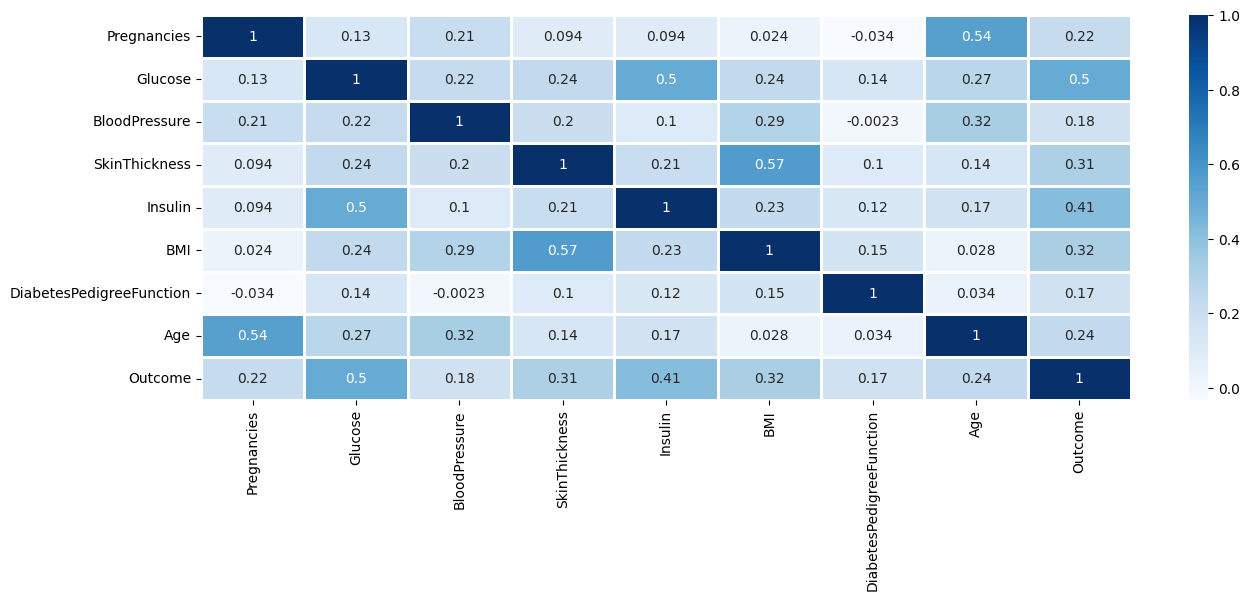

In [6]:
plt.figure(figsize=(15,5),facecolor='w')
sns.heatmap(corrdf,vmax=1,square=False,annot=True,linewidths=1,cmap=plt.cm.Blues)

In [7]:
df_copy.describe()
df_copy[df_copy['Outcome'] == 0].describe()
df_copy[df_copy['Outcome'] == 1].describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.0
mean,4.865672,142.319549,75.321429,33.000000,206.846154,35.406767,0.550500,37.067164,1.0
std,3.741239,29.488132,11.925638,8.456099,92.237987,6.590161,0.372354,10.968254,0.0
min,0.000000,78.000000,30.000000,7.000000,14.000000,22.900000,0.088000,21.000000,1.0
25%,1.750000,119.000000,68.000000,30.000000,175.000000,30.900000,0.262500,28.000000,1.0
50%,4.000000,140.500000,75.321429,33.000000,206.846154,34.300000,0.449000,36.000000,1.0
75%,8.000000,167.000000,82.000000,36.000000,206.846154,38.775000,0.728000,44.000000,1.0
max,17.000000,199.000000,114.000000,99.000000,846.000000,67.100000,2.420000,70.000000,1.0


In [8]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
source_x=pd.DataFrame(sc_X.fit_transform(df_copy.drop(['Outcome'],axis=1),),columns=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'])
source_x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.864020,-0.035389,0.645088,0.561272,0.167806,0.468492,1.425995
1,-0.844885,-1.205478,-0.531332,-0.027701,-0.300842,-0.850452,-0.365061,-0.190672
2,1.233880,2.013741,-0.696647,0.420825,0.561272,-1.330487,0.604397,-0.105584
3,-0.844885,-1.074081,-0.531332,-0.700491,-0.709475,-0.632253,-0.920763,-1.041549
4,-1.141852,0.502679,-2.680419,0.645088,0.123830,1.549727,5.484909,-0.020496


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

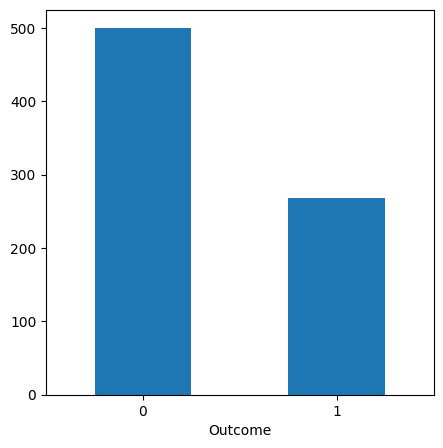

In [9]:
df.Outcome.value_counts()
plt.figure(figsize=(5,5),facecolor='w')
df.Outcome.value_counts().plot.bar()
plt.xticks(rotation=0)

In [10]:
from sklearn.model_selection import train_test_split
source_y=df_copy.Outcome
train_X,test_X,train_y,test_y=train_test_split(source_x,source_y,train_size=0.8,random_state=0)
print('原始数据特征：',source_x.shape,
      '训练数据特征：',train_X.shape,
      '测试数据特征：',test_X.shape)

原始数据特征： (768, 8) 训练数据特征： (614, 8) 测试数据特征： (154, 8)


In [11]:
from sklearn.linear_model import LogisticRegression
log_mod = LogisticRegression()
log_mod.fit(train_X,train_y)
preds = log_mod.predict(test_X)

In [12]:
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(test_y,preds)
accuracy_score(test_y,preds)

0.8051948051948052